In [6]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
from skimage import feature

In [5]:
def Hog_extract (path):
  data = []
  label = []
  m = 0
  for i in os.listdir(path):
    if (m % 10) == 9:
      img = cv.imread(os.path.join(path,i),0)
      img = cv.resize(img, (200,200))
      (H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                                  visualize=True)
      if H is not None:
        #data.append(H.reshape(576,36)) #patches * size H 
        data.append(H)
        label.append(i[0:3])
    m+=1
    if (m % 10000) == 0:
      print (m)
  return data, label

(20736,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


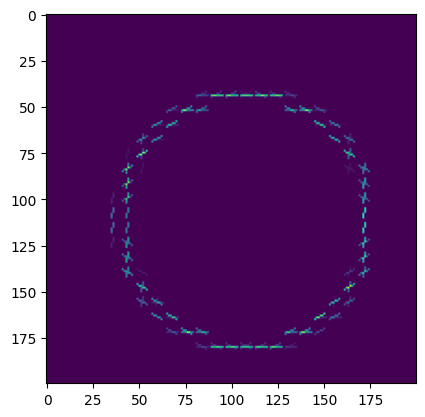

In [18]:
img = cv.imread('E:\\Year4_Sec1\\Image_Pro\\P11\\dataset\\output\\Circle_0a2d3e5c-2a8b-11ea-8123-8363a7ec19e6.png',0)
img = cv.resize(img, (200,200))
(H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualize=True)
print(H.shape)
H_ = H.reshape(576,36)
print(H_[210])
plt.imshow(hogImage)

In [6]:
path = "E:\\Year4_Sec1\\Image_Pro\\P11\dataset\\output"

data, label = Hog_extract(path)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, random_state=42)

10000
20000
30000
40000
50000
60000
70000
80000
90000


In [3]:


print(X_train[1].shape)

NameError: name 'X_train' is not defined

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
#print(neigh.predict([all_data[280]])) 
print(neigh.score(X_test, y_test))

0.33555555555555555


In [26]:
import pickle

knnPickle = open('knnpickle_file', 'wb') 
      
# source, destination 
pickle.dump(neigh, knnPickle)  

# close the file
knnPickle.close()
                
      
# load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))
result = loaded_model.predict(X_test[0]) 

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'H' is not defined

In [48]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel= 'rbf',gamma='auto'))
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

In [3]:
import pickle
neigh = pickle.load(open('knnpickle_file', 'rb'))
#result = loaded_model.predict(X_test[0]) 

In [4]:
def Pre_Label(path):
    img = cv.imread(path,0)
    img = cv.resize(img, (200,200))
    (H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualize=True)
    range_x = []
    range_y = []
    for i in range (200):
        if np.sum(hogImage[i,:]) != 0:
            range_x.append(i)
        if np.sum(hogImage[:,i]) != 0:
            range_y.append(i)
    label = neigh.predict(H.reshape(1, -1))
    return np.min(range_x), np.min(range_y), np.max(range_x), np.max(range_y), label



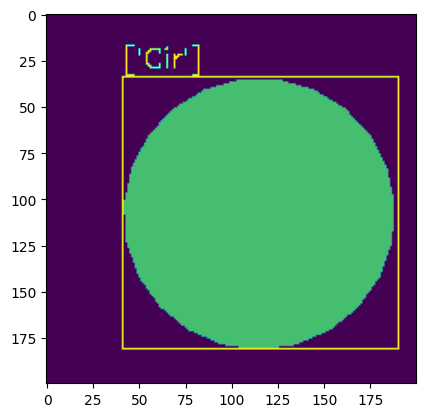

In [25]:
path = 'E:\\Year4_Sec1\\Image_Pro\\P11\\dataset\\output\\Circle_15e0dff0-2a91-11ea-8123-8363a7ec19e6.png'
img = cv.imread(path,0)

(y_start, x_start, y_end, x_end, label_pre) = Pre_Label(path)
label_pre = np.array2string(label_pre)

img = cv.rectangle(img, (x_start, y_start), (x_end,y_end), color = (255, 0, 0), thickness = 1)
img = cv.putText(img, label_pre, (x_start, y_start-5), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0) , 1, 1)
plt.imshow(img)

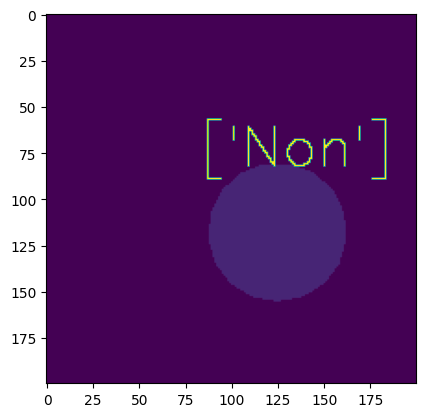